In [1]:
from keras.layers import Dense

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D

In [3]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [5]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [6]:
train_labels = []
train_samples = []

In [7]:
for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

 
   

In [8]:
for i in train_samples:
    print(i)

56
77
15
67
22
97
48
74
57
86
55
98
50
93
22
90
31
100
58
75
36
74
37
90
29
83
59
92
18
79
47
86
56
86
32
67
54
70
44
66
20
86
64
66
15
75
27
91
38
74
42
89
29
75
55
76
45
92
49
89
62
90
24
91
15
82
47
98
51
91
36
78
40
99
15
98
31
93
59
68
58
94
33
82
50
98
44
80
41
68
52
98
42
69
49
71
57
85
20
79
23
61
56
17
24
55
56
30
30
63
63
19
39
36
13
13
28
23
20
32
62
42
31
19
58
47
63
56
28
35
40
14
40
56
63
18
22
39
20
49
33
39
27
44
28
23
14
47
44
13
63
28
38
61
23
40
40
46
40
43
13
46
22
53
15
31
17
63
41
58
45
40
37
32
57
51
62
61
63
37
37
52
41
46
37
19
28
28
53
55
61
26
16
50
54
52
21
39
52
28
25
44
61
28
55
30
31
39
28
43
27
58
42
52
35
56
30
30
14
48
57
15
15
64
17
24
20
50
15
36
62
51
39
31
35
64
15
21
60
58
64
44
32
24
60
31
47
29
58
63
64
24
62
33
36
33
20
18
61
34
44
19
58
37
53
53
43
53
42
32
59
13
60
45
28
20
55
51
36
17
21
63
14
15
17
44
30
52
57
46
44
39
62
18
28
31
49
21
48
60
49
51
39
26
62
58
46
53
64
46
20
52
45
36
26
15
59
56
58
26
30
64
23
55
45
60
48
15
38
64
53
32
47


In [12]:
for i in train_labels:
    print(i)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [13]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [14]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [15]:
for i in scaled_train_samples:
    print(i)

[0.56321839]
[0.31034483]
[0.12643678]
[0.55172414]
[0.27586207]
[0.45977011]
[0.40229885]
[0.35632184]
[0.17241379]
[0.50574713]
[0.03448276]
[0.35632184]
[0.06896552]
[0.43678161]
[0.34482759]
[0.26436782]
[0.32183908]
[0.43678161]
[0.36781609]
[0.22988506]
[0.35632184]
[0.47126437]
[0.18390805]
[0.57471264]
[0.83908046]
[0.37931034]
[0.47126437]
[0.54022989]
[0.42528736]
[0.50574713]
[0.51724138]
[0.03448276]
[0.12643678]
[0.31034483]
[0.10344828]
[0.44827586]
[0.42528736]
[0.50574713]
[0.45977011]
[0.01149425]
[0.27586207]
[0.49425287]
[0.05747126]
[0.55172414]
[0.27586207]
[0.22988506]
[0.1954023]
[0.51724138]
[0.33333333]
[0.34482759]
[0.70114943]
[0.40229885]
[0.4137931]
[0.2183908]
[0.5862069]
[0.50574713]
[0.49425287]
[0.28735632]
[0.5862069]
[0.06896552]
[0.49425287]
[0.]
[0.48275862]
[0.03448276]
[0.05747126]
[0.10344828]
[0.4137931]
[0.14942529]
[0.17241379]
[0.40229885]
[0.8045977]
[0.42528736]
[0.56321839]
[0.45977011]
[0.22988506]
[0.50574713]
[0.29885057]
[0.43678161]
[

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy


In [17]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [22]:
import os.path
if os.path.isfile('C:/Users/robot/models/medical_trial_model.h5') is False:
    model.save('C:/Users/robot/models/medical_trial_model.h5')

In [24]:
from tensorflow.keras.models import load_model
new_model = load_model('C:/Users/robot/models/medical_trial_model.h5')

In [25]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [26]:
json_string = model.to_json()
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

In [27]:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

In [28]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.save_weights('C:/Users/robot/models/medical_trial_model.h5')

In [30]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, verbose=2)

Epoch 1/30
99/99 - 0s - loss: 0.6958 - accuracy: 0.5091 - val_loss: 0.6623 - val_accuracy: 0.9636
Epoch 2/30
99/99 - 0s - loss: 0.6315 - accuracy: 0.9535 - val_loss: 0.5984 - val_accuracy: 0.9636
Epoch 3/30
99/99 - 0s - loss: 0.5685 - accuracy: 0.9535 - val_loss: 0.5353 - val_accuracy: 0.9636
Epoch 4/30
99/99 - 0s - loss: 0.5079 - accuracy: 0.9535 - val_loss: 0.4742 - val_accuracy: 0.9636
Epoch 5/30
99/99 - 0s - loss: 0.4503 - accuracy: 0.9535 - val_loss: 0.4157 - val_accuracy: 0.9636
Epoch 6/30
99/99 - 0s - loss: 0.3954 - accuracy: 0.9535 - val_loss: 0.3578 - val_accuracy: 0.9636
Epoch 7/30
99/99 - 0s - loss: 0.3405 - accuracy: 0.9535 - val_loss: 0.3032 - val_accuracy: 0.9636
Epoch 8/30
99/99 - 0s - loss: 0.2975 - accuracy: 0.9535 - val_loss: 0.2626 - val_accuracy: 0.9636
Epoch 9/30
99/99 - 0s - loss: 0.2665 - accuracy: 0.9535 - val_loss: 0.2329 - val_accuracy: 0.9636
Epoch 10/30
99/99 - 0s - loss: 0.2446 - accuracy: 0.9535 - val_loss: 0.2107 - val_accuracy: 0.9636
Epoch 11/30
99/99 -

In [32]:
test_labels =  []
test_samples = []

for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [33]:
predictions = model.predict(
      x=scaled_test_samples
    , batch_size=10
    , verbose=0
)  

In [34]:
for i in predictions:
    print(i)

[0.9938128  0.00618716]
[0.9852932  0.01470678]
[0.9825194  0.01748062]
[0.9895979  0.01040207]
[0.9938128  0.00618716]
[0.9426652  0.05733481]
[0.9912511  0.00874892]
[0.95459425 0.04540573]
[0.90011466 0.09988529]
[0.97923344 0.0207666 ]
[0.9921144  0.00788566]
[0.9895979  0.01040207]
[0.9867444  0.01325558]
[0.9912511  0.00874892]
[0.89322096 0.10677902]
[0.95459425 0.04540573]
[0.9825194  0.01748062]
[0.9895979  0.01040207]
[0.93669784 0.06330216]
[0.9892319 0.0107682]
[0.9884609  0.01153913]
[0.9806147  0.01938529]
[0.9178492  0.08215086]
[0.97359854 0.02640148]
[0.9825194  0.01748062]
[0.990624   0.00937599]
[0.9912511  0.00874892]
[0.9847756  0.01522447]
[0.9935947  0.00640535]
[0.98627704 0.01372289]
[0.9921144  0.00788566]
[0.9707508  0.02924921]
[0.97993565 0.02006431]
[0.96413577 0.0358642 ]
[0.990624   0.00937599]
[0.9717317  0.02826833]
[0.98423994 0.01576009]
[0.9426652  0.05733481]
[0.9831125  0.01688753]
[0.9445341  0.05546585]
[0.9676061 0.0323939]
[0.9825194  0.017480

In [35]:
rounded_predictions = np.argmax(predictions, axis=-1)

for i in rounded_predictions:
    print(i)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [36]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [37]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [38]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [39]:
cm_plot_labels = ['no_side_effects','had_side_effects']

Confusion matrix, without normalization
[[210   0]
 [210   0]]


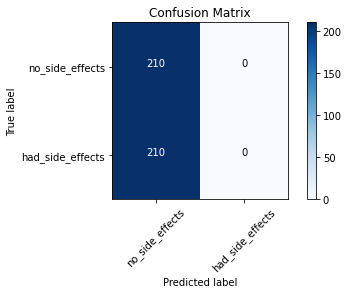

In [40]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')